## Traffic

In [0]:
%%script echo
# code to unzip the gtsrb file
import zipfile as zf
import os
files = zf.ZipFile("traffic/gtsrb.zip", 'r') # chnage the path as per 
files.extractall('/traffic/gtsrb')
files.close()

## Import Packages

In [0]:
# import packages
import os, cv2, sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# define empty list to store the images to be read
images = []
labels = []

In [0]:
# define input parameters
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

## Read the image files of traffic signs

The `gtsrb` directory will have 43 subdirectories in this dataset. Each numbered subdirectory represents a different category (a different type of road sign). Within each traffic sign’s directory is a collection of images of that type of traffic sign.

The next code block uses the `opencv` library to read the images for each of the subdirectories in the `gtsrb` directory. Then, each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should be a list of integer labels, representing the categories for each of the corresponding `images`.

In [0]:
category = 0
while category < NUM_CATEGORIES:
    directory = os.path.dirname(os.getcwd())+os.sep+'gtsrb'+os.sep+str(category)
    print
    for file in os.listdir(directory):
        img = cv2.imread(os.path.join(directory,file))
        img =cv2.resize(img,(IMG_WIDTH, IMG_HEIGHT),interpolation=cv2.INTER_AREA)
        images.append(img)
        labels.append(category)
    category = category + 1

In [0]:
len(images)

Out[6]: 26640

Plot some random images to get a visual represenatation of the images

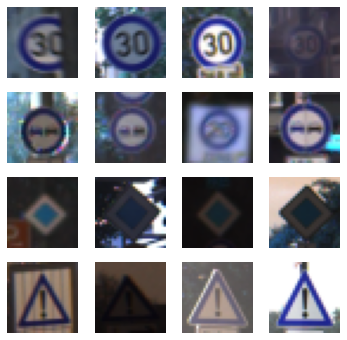

In [0]:
# random indices of the images for plotting
traffic_signs = [215,333,400,977,
                 9000,9345,94,9478,
                 12499,12980,13017,13333,
                 17101,17555,17800,17659]
fig = plt.gcf()
fig.set_size_inches(6,6)
# fill out the subplots with the random images for which the indices are defined above
for i in range(len(traffic_signs)):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])

Conver labels to categorial variable and split the data into training and testing sets

In [0]:
# convert the 'labels' to categorical variable
labels = tf.keras.utils.to_categorical(labels)

# split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(np.array(images),np.array(labels),test_size = TEST_SIZE)

In [0]:
# check shape of train and test data
print('Train and Test data shapes:')
print(f'x_train: {str(x_train.shape)}')
print(f'y_train: {str(y_train.shape)}')
print(f'x_test:  {str(x_test.shape)}')
print(f'y_test:  {str(y_test.shape)}')

Train and Test data shapes:
x_train: (15984, 30, 30, 3)
y_train: (15984, 43)
x_test:  (10656, 30, 30, 3)
y_test:  (10656, 43)


Next, we build a convolution neural network model.

## Base Model

Using a sequential model to build a model in keras and use the add function to add layers to the model. The base model is a simple Conv2D model with the following layers.

1. A Conv2D layer with 32 feature maps, which with a 3x3 kernel and a rectifier activation function.
2. Next we define a pooling layer MaxPooling2D layer that takes the max, configured with a pool size of 2×2.
3. Next is the Flatten layer that converts the 2D matrix data to a vector
4. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each label.

In [0]:
# Build the base CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(NUM_CATEGORIES,activation='softmax'))

In [0]:
# check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                269739    
Total params: 270,635
Trainable params: 270,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=EPOCHS)

Train on 15984 samples, validate on 10656 samples
Epoch 1/10
15984/15984 [==============================] - 5s 333us/sample - loss: 7.0239 - accuracy: 0.6674 - val_loss: 0.5902 - val_accuracy: 0.8742
Epoch 2/10
15984/15984 [==============================] - 4s 261us/sample - loss: 0.3755 - accuracy: 0.9142 - val_loss: 0.5128 - val_accuracy: 0.9045
Epoch 3/10
15984/15984 [==============================] - 4s 245us/sample - loss: 0.2333 - accuracy: 0.9474 - val_loss: 0.6247 - val_accuracy: 0.8962
Epoch 4/10
15984/15984 [==============================] - 4s 227us/sample - loss: 0.2251 - accuracy: 0.9509 - val_loss: 0.4602 - val_accuracy: 0.9206
Epoch 5/10
15984/15984 [==============================] - 4s 229us/sample - loss: 0.1810 - accuracy: 0.9604 - val_loss: 0.5883 - val_accuracy: 0.9199
Epoch 6/10
15984/15984 [==============================] - 4s 271us/sample - loss: 0.1913 - accuracy: 0.9584 - val_loss: 0.5009 - val_accuracy: 0.9230
Epoch 7/10
15984/15984 [==========================

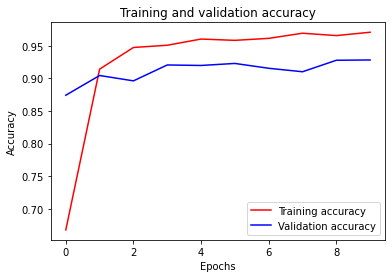

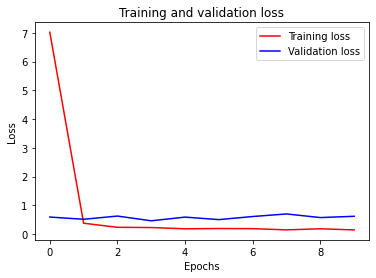

In [0]:
# Plot training and validation accuracy/loss over epochs

# get training and test accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

A simple CNN model with just one Conv2D layer shows a decent training accuracy. The training accuracy is close to 97% while the validation accuracy is approx. 90%, it seems like the model is overfitting. The plot of training and validation accuracy shows that the training accuracy saturates over time which suggests that the model is not learning anything new.

## Model 1

In this iteration, we add a `Dropout layer` configured to randomly exclude 50% of neurons in the layer in order to reduce overfitting.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(NUM_CATEGORIES,activation='softmax'))

In [0]:
# check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                269739    
Total params: 270,635
Trainable params: 270,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=EPOCHS)

Train on 15984 samples, validate on 10656 samples
Epoch 1/10
15984/15984 [==============================] - 5s 309us/sample - loss: 7.7278 - accuracy: 0.6522 - val_loss: 0.7240 - val_accuracy: 0.8557
Epoch 2/10
15984/15984 [==============================] - 5s 288us/sample - loss: 0.4916 - accuracy: 0.8818 - val_loss: 0.5054 - val_accuracy: 0.8955
Epoch 3/10
15984/15984 [==============================] - 5s 311us/sample - loss: 0.3954 - accuracy: 0.9103 - val_loss: 0.4885 - val_accuracy: 0.8967
Epoch 4/10
15984/15984 [==============================] - 7s 408us/sample - loss: 0.3354 - accuracy: 0.9213 - val_loss: 0.4997 - val_accuracy: 0.9046
Epoch 5/10
15984/15984 [==============================] - 5s 324us/sample - loss: 0.3455 - accuracy: 0.9271 - val_loss: 0.4883 - val_accuracy: 0.9090
Epoch 6/10
15984/15984 [==============================] - 5s 299us/sample - loss: 0.2795 - accuracy: 0.9375 - val_loss: 0.6125 - val_accuracy: 0.8999
Epoch 7/10
15984/15984 [==========================

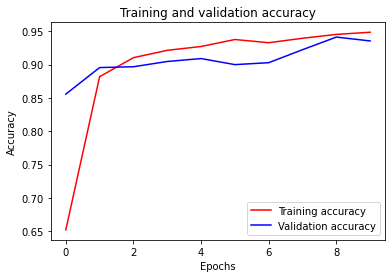

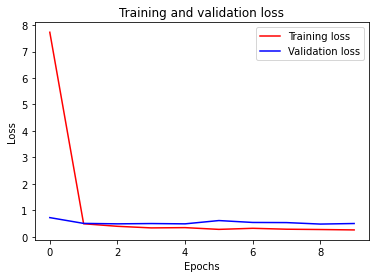

In [0]:
# Plot training and validation accuracy/loss over epochs

# get training and test accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

The training accuracy reduces slightly compared to the first model but the validation accuracy improves. This suggests that the model is performing better on the unseen data. This is noticeable in the accuracy plot where the gap between training and validation accuracy is reduced.

## Model 2

In this iteration, we add another Conv2D layer with 64 feature maps followed by a fully connected layer with 128 neurons. 

What happens when we increase the number of filters in a Conv2D layer? 

The higher the number of filters, the higher the number of abstractions that our network is able to extract from image data. The number of filters is generally ascending is due to the fact that at the input layer the network receives raw pixel data which are always noisy, and this is especially true for image data. Because of this, we let CNNs extract first some relevant information from noisy, "dirty" raw pixel data. Once the useful features have been extracted, then we make the CNN elaborate more complex abstractions on it.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CATEGORIES,activation='softmax'))

In [0]:
# check model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=EPOCHS)

Train on 15984 samples, validate on 10656 samples
Epoch 1/10
15984/15984 [==============================] - 8s 484us/sample - loss: 2.3282 - accuracy: 0.5561 - val_loss: 0.6525 - val_accuracy: 0.8020
Epoch 2/10
15984/15984 [==============================] - 7s 427us/sample - loss: 0.5492 - accuracy: 0.8462 - val_loss: 0.4415 - val_accuracy: 0.8717
Epoch 3/10
15984/15984 [==============================] - 7s 452us/sample - loss: 0.3315 - accuracy: 0.9050 - val_loss: 0.2346 - val_accuracy: 0.9427
Epoch 4/10
15984/15984 [==============================] - 9s 545us/sample - loss: 0.2415 - accuracy: 0.9332 - val_loss: 0.2564 - val_accuracy: 0.9371
Epoch 5/10
15984/15984 [==============================] - 7s 434us/sample - loss: 0.2118 - accuracy: 0.9398 - val_loss: 0.2037 - val_accuracy: 0.9440
Epoch 6/10
15984/15984 [==============================] - 7s 414us/sample - loss: 0.1991 - accuracy: 0.9449 - val_loss: 0.1732 - val_accuracy: 0.9538
Epoch 7/10
15984/15984 [==========================

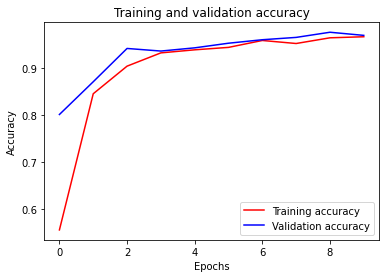

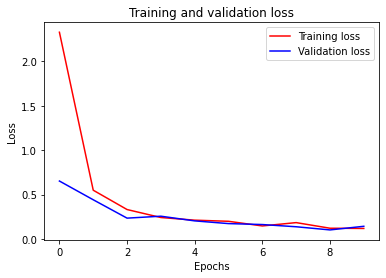

In [0]:
# Plot training and validation accuracy/loss over epochs

# get training and test accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

By adding a fully connected layer, training model accuracy improves futher while the validation accuracy becomes even better than that of the previous model.

Model accuracy further improves on the both training and validation data by adding a Conv2D layer with 128 filters.

**Note:** Adding more convolution layers with increasing filters does not always guarantee improvement in accuracy all the time.

|Iteration| Model Components | Training Accuracy | Validation Accuracy
| --------- |:----------- |----------|------------|
| <p style='text-align: left;'>Base | <p style='text-align: left;'>Conv2D, MaxPooling, Flatten| 97.08%| 92.83%|
| <p style='text-align: left;'>Model 1 |<p style='text-align: left;'>Add a Dropout Layer to the base model| 94.84%|93.53%|
| <p style='text-align: left;'>Model 2 |<p style='text-align: left;'>Add another Conv2D layer and a Dense layer | 96.76%|97.05%|

### Summary

1. The base model performs wells on the training dataset. However, this seems to be a case of overfitting as the model does not perform well on the test data.

2. Adding a `Dropout` layer does not improve accuracy suggesting further layers need to be added to enhance model accuracy.

3. Adding another `Conv2D` layer along with a fully connected layer improves the training model accuracy from the pevious model and generalizes pretty well on the testing data.